In [12]:
import pandas as pd

## 왓챠 평점과 네이버 평점비교하기 (흥행작과 수상작을 기준으로)

### 가설  
흥행작의 경우 네이버 평점이, 수상작의 경우 왓챠평점이 각각 높을 것으로 예상된다.  
이는 좀 더 대중적인 네이버 영화의 평점과, 네이버보다는 좀 더 전문적인 왓챠 평점의 성향의 차이때문일 것으로 추측.  
이에 따라, 네티즌 평점과 왓챠 평점의 관계성과 평론가 평점과 왓챠평점의 관계성도 비교해볼것.  

### 데이터 전처리

In [44]:
수상작 = pd.read_csv("수상작_리뷰.csv",encoding='cp949')
수상작_정리 = 수상작[["연도","제목","장르","관객수","매출액","왓챠평점","네티즌평점","평론가평점"]]
수상작_정리

,연도,제목,장르,관객수,매출액,왓챠평점,네티즌평점,평론가평점
0,2020,사탄은 없다,"드라마, 액션",NaN,NaN,3.7,NaN,NaN
1,2020,노마드랜드,드라마,NaN,NaN,3.8,NaN,NaN
2,2019,기생충,드라마,10252659.0,8.696360e+10,4.3,8.48,9.06
3,2019,시너님스,드라마,NaN,NaN,3.3,NaN,NaN
4,2019,조커,"스릴러, 드라마, 범죄",5229027.0,4.521506e+10,3.9,8.66,7.64
5,2018,어느 가족,"범죄, 드라마",123614.0,1.037980e+09,4.1,9.21,8.13
6,2018,그린 북,"코미디, 드라마, 음악",319767.0,2.693499e+09,4.2,9.59,7.29
7,2018,터치 미 낫,드라마,NaN,NaN,3.0,NaN,NaN
8,2018,로마,드라마,NaN,NaN,4.1,9.04,8.80
9,2017,더 스퀘어,"드라마, 코미디",4141.0,3.513430e+07,3.6,7.64,7.25


In [45]:
흥행작 = pd.read_csv("1020흥행작.csv",encoding='cp949')
흥행작_정리 = 흥행작[["연도","제목","장르","관객수","매출액","왓챠평점","네티즌평점","평론가평점"]]
흥행작_정리

,연도,제목,장르,관객수,매출액,왓챠평점,네티즌평점,평론가평점
0,2010,아바타,SF,8101481,8.081990e+10,3.9,9.07,8.83
1,2010,아저씨,드라마,6153307,4.691262e+10,3.9,9.24,6.25
2,2010,인셉션,액션,5818692,4.332849e+10,4.4,9.23,7.93
3,2010,의형제,드라마,5401659,4.005799e+10,3.5,8.87,7.55
4,2010,아이언맨 2,SF,4416203,3.256592e+10,4.0,7.37,5.47
...,...,...,...,...,...,...,...,...
105,2020,백두산,드라마,1949993,1.682616e+10,2.9,5.75,5.67
106,2020,#살아있다,드라마,1900179,1.594720e+10,2.1,4.14,5.57
107,2020,강철비2: 정상회담,드라마,1790010,1.464926e+10,2.7,5.01,6.64
108,2020,담보,드라마,1710353,1.467980e+10,2.7,8.91,5.20


In [46]:
수상작_정리['왓챠평점(평준화)'] = 수상작_정리['왓챠평점'] *2
흥행작_정리['왓챠평점(평준화)'] = 흥행작_정리['왓챠평점'] *2

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
수상작_정리= 수상작_정리[["연도","제목","왓챠평점(평준화)","네티즌평점","평론가평점"]]
흥행작_정리= 흥행작_정리[["연도","제목","왓챠평점(평준화)","네티즌평점","평론가평점"]]

In [167]:
수상작_null제거 = 수상작_정리.dropna()
수상작_null제거

,연도,제목,왓챠평점(평준화),네티즌평점,평론가평점
2,2019,기생충,8.6,8.48,9.06
4,2019,조커,7.8,8.66,7.64
5,2018,어느 가족,8.2,9.21,8.13
6,2018,그린 북,8.4,9.59,7.29
8,2018,로마,8.2,9.04,8.80
9,2017,더 스퀘어,7.2,7.64,7.25
10,2017,셰이프 오브 워터: 사랑의 모양,7.8,8.33,8.18
11,2017,우리는 같은 꿈을 꾼다,7.2,8.05,7.67
12,2016,"나, 다니엘 블레이크",8.2,9.30,8.40
13,2016,문라이트,7.6,8.07,7.89


In [50]:
흥행작_정리

,연도,제목,왓챠평점(평준화),네티즌평점,평론가평점
0,2010,아바타,7.8,9.07,8.83
1,2010,아저씨,7.8,9.24,6.25
2,2010,인셉션,8.8,9.23,7.93
3,2010,의형제,7.0,8.87,7.55
4,2010,아이언맨 2,8.0,7.37,5.47
...,...,...,...,...,...
105,2020,백두산,5.8,5.75,5.67
106,2020,#살아있다,4.2,4.14,5.57
107,2020,강철비2: 정상회담,5.4,5.01,6.64
108,2020,담보,5.4,8.91,5.20


### 분석

1. 왓챠평점과 네티즌, 평론가 평점 수치비교

In [79]:
수상작_정리_연도별 = 수상작_정리.groupby("연도").mean()
수상작_정리_연도별 = 수상작_정리_연도별.reset_index()
수상작_정리_연도별

,연도,왓챠평점(평준화),네티즌평점,평론가평점
0,2010,7.050000,7.956667,7.926667
1,2011,7.200000,8.527500,6.990000
2,2012,7.100000,8.272500,7.627500
3,2013,7.100000,8.685000,7.885000
4,2014,7.250000,8.235000,7.625000
5,2015,7.080000,6.766667,6.166667
6,2016,7.800000,8.685000,8.145000
7,2017,7.400000,8.006667,7.700000
8,2018,7.700000,9.280000,8.073333
9,2019,7.666667,8.570000,8.350000


In [80]:
흥행작_정리_연도별 = 흥행작_정리.groupby("연도").mean()
흥행작_정리_연도별 = 흥행작_정리_연도별.reset_index()
흥행작_정리_연도별 

,연도,왓챠평점(평준화),네티즌평점,평론가평점
0,2010,7.26,8.379,6.525
1,2011,7.30,8.605,6.699
2,2012,7.46,8.366,6.816
3,2013,7.38,8.045,6.881
4,2014,7.46,8.402,6.458
5,2015,7.66,8.706,6.766
6,2016,7.26,8.257,6.550
7,2017,7.34,8.490,6.227
8,2018,7.24,8.377,6.457
9,2019,7.60,8.223,7.019


In [61]:
수상작_정리.mean()

연도           2014.575000
왓챠평점(평준화)       7.315000
네티즌평점           8.270714
평론가평점           7.595926
dtype: float64

In [64]:
흥행작_정리.mean()

연도           2015.000000
왓챠평점(평준화)       7.256364
네티즌평점           8.224091
평론가평점           6.591636
dtype: float64

2. 수상작과 흥행작의 왓챠평점과 네티즌, 평론가평점 사이의 상관성 분석

In [51]:
import numpy as np

In [56]:
수상작_왓챠네티즌_coef = np.corrcoef(수상작_null제거['왓챠평점(평준화)'],  수상작_null제거['네티즌평점'])[1,0]
수상작_왓챠평론가_coef = np.corrcoef(수상작_null제거['왓챠평점(평준화)'],  수상작_null제거['평론가평점'])[1,0]

흥행작_왓챠네티즌_coef = np.corrcoef(흥행작_정리['왓챠평점(평준화)'],  흥행작_정리['네티즌평점'])[1,0]
흥행작_왓챠평론가_coef = np.corrcoef(흥행작_정리['왓챠평점(평준화)'],  흥행작_정리['평론가평점'])[1,0]

In [57]:
print("수상작_왓챠네티즌_coef:",수상작_왓챠네티즌_coef)
print("수상작_왓챠평론가_coef:",수상작_왓챠평론가_coef)
print("흥행작_왓챠네티즌_coef:",흥행작_왓챠네티즌_coef)
print("흥행작_왓챠평론가_coef:",흥행작_왓챠평론가_coef)

수상작_왓챠네티즌_coef: 0.5404032703775025
수상작_왓챠평론가_coef: 0.43047348300890986
흥행작_왓챠네티즌_coef: 0.7363359979466859
흥행작_왓챠평론가_coef: 0.5779541301207748


### 시각화

In [67]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family="NanumGothic")

In [102]:
수상작_정리_연도별["분류"] = "수상작"
흥행작_정리_연도별["분류"] = "흥행작"

In [107]:
평점_총정리 = pd.concat([수상작_정리_연도별,흥행작_정리_연도별])
평점_총정리

,연도,왓챠평점(평준화),네티즌평점,평론가평점,분류
0,2010,7.050000,7.956667,7.926667,수상작
1,2011,7.200000,8.527500,6.990000,수상작
2,2012,7.100000,8.272500,7.627500,수상작
3,2013,7.100000,8.685000,7.885000,수상작
4,2014,7.250000,8.235000,7.625000,수상작
5,2015,7.080000,6.766667,6.166667,수상작
6,2016,7.800000,8.685000,8.145000,수상작
7,2017,7.400000,8.006667,7.700000,수상작
8,2018,7.700000,9.280000,8.073333,수상작
9,2019,7.666667,8.570000,8.350000,수상작


#### 1) 각 매체별 평균 평점 비교(수상작,흥행작 기준) 

In [163]:
평점 = 평점_총정리.dropna()
평점_평균 = 평점.pivot_table( columns="분류", values=["왓챠평점(평준화)","네티즌평점","평론가평점"]).T
평점_평균 = 평점_평균[["왓챠평점(평준화)","네티즌평점","평론가평점"]]
평점_평균.columns = ["왓챠","네이버_네티즌","네이버_평론가"]
평점_평균

,왓챠,네이버_네티즌,네이버_평론가
분류,,,
수상작,7.334667,8.298500,7.648917
흥행작,7.256364,8.224091,6.591636


#### 2) 연도별, 평균 평점 추이 비교(수상작,흥행작 기준) 

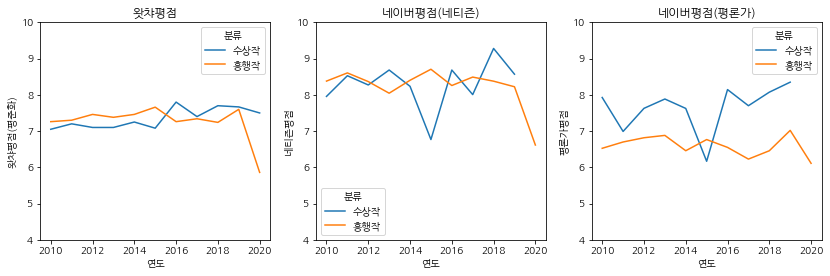

In [131]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(14,4))

sns.lineplot(data = 평점_총정리, x = "연도", y ="왓챠평점(평준화)", hue= "분류" , ci =None, ax=axes[0])

sns.lineplot(data = 평점_총정리, x = "연도", y ="네티즌평점", hue= "분류" , ci =None, ax=axes[1])

sns.lineplot(data = 평점_총정리, x = "연도", y ="평론가평점", hue= "분류" , ci =None, ax=axes[2])


axes[0].title.set_text("왓챠평점")
axes[0].set(ylim=(4,10))
axes[1].title.set_text("네이버평점(네티즌)")
axes[1].set(ylim=(4,10))
axes[2].title.set_text("네이버평점(평론가)")
axes[2].set(ylim=(4,10))


plt.show()

In [164]:
print("수상작_왓챠네티즌_coef:",수상작_왓챠네티즌_coef)
print("수상작_왓챠평론가_coef:",수상작_왓챠평론가_coef)
print("흥행작_왓챠네티즌_coef:",흥행작_왓챠네티즌_coef)
print("흥행작_왓챠평론가_coef:",흥행작_왓챠평론가_coef)

수상작_왓챠네티즌_coef: 0.5404032703775025
수상작_왓챠평론가_coef: 0.43047348300890986
흥행작_왓챠네티즌_coef: 0.7363359979466859
흥행작_왓챠평론가_coef: 0.5779541301207748


가설)   
- 흥행작의 경우 네이버 평점이, 수상작의 경우 왓챠평점이 각각 높을 것으로 예상된다.  
- 왓챠의 수상작 평점은 네이버 네티즌 평점보다 네이버 평론가 평점과 더 유사할 것으로 예상된다.

  
분석 결과)   
- 수상작과 흥행작의 왓챠평점과 네이버 평점의 경우, 유의미한 차이를 보이진 않음  
하지만, 왓챠의 평균 평점이 네이버 네티즌의 평균 평점보다 낮다는 것으로 왓챠의 평점 기준이 더 높다고 보여짐   
    
- 평론가 평점의 경우, 확실히 수상작의 평점이 더 높다는 것을 알 수 있음